In [3]:
import pandas as pd
import metnum
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

df_completo = pd.read_csv('../data/train.csv')
df_completo['ciudad'].value_counts()

Querétaro               12646
Benito Juárez           11014
Zapopan                 10360
San Luis Potosí          7925
Mérida                   7162
                        ...  
San José del Rincón         1
Santo Tomás                 1
Amatlán de los Reyes        1
Ocuilan                     1
Rayones                     1
Name: ciudad, Length: 875, dtype: int64

In [4]:
propGroup = 'ciudad'
groups = [
    'Querétaro',
    'Benito Juárez',
    'Zapopan',
    'San Luis Potosí',
    'Mérida'
]

In [5]:
props = [
    'antiguedad'
]
phis = [ 
        lambda x: (1/(x+1)) #antiguo
]
pred = 'habitaciones'

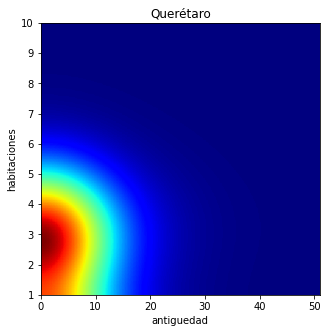

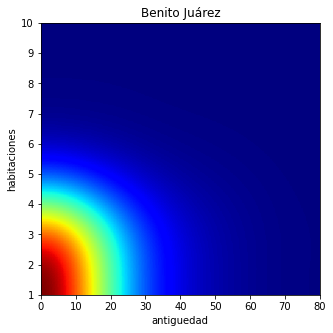

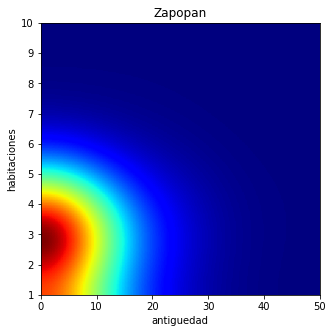

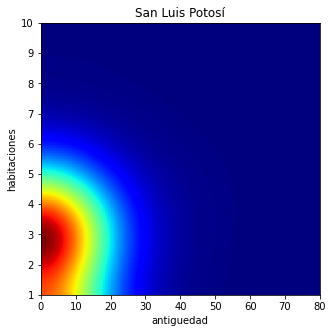

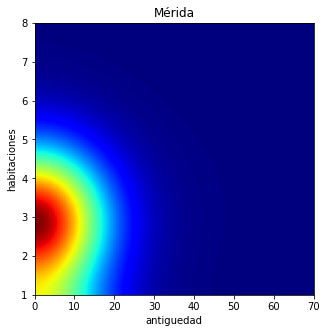

In [6]:
for i in range(len(groups)):
    df_group = df_completo[df_completo[propGroup]==groups[i]]
    fData = utils.filterData(df_group, props, pred)
    utils.showHeatMap(fData['antiguedad'], fData[pred], 'antiguedad', 'habitaciones', groups[i])

Podriamos decir que mientras mas nuevo mas habitaciones suele tener?

In [7]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Querétaro es de 0.700499875108033
Error de precision para Benito Juárez es de 0.8805382815827708
Error de precision para Zapopan es de 0.824741195043992
Error de precision para San Luis Potosí es de 0.7138460602532185
Error de precision para Mérida es de 0.6093745209924684


Veamos si conocer los baños ayuda mas

In [8]:
props = [
    'antiguedad',
    'banos'
]

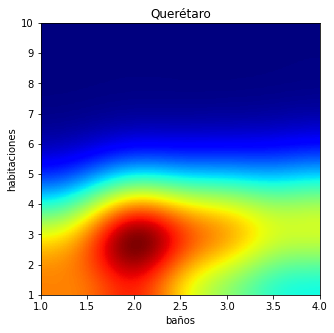

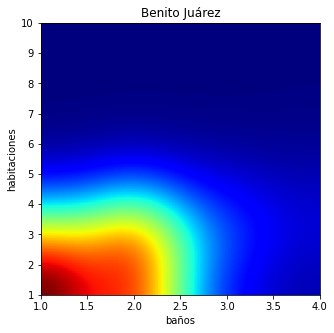

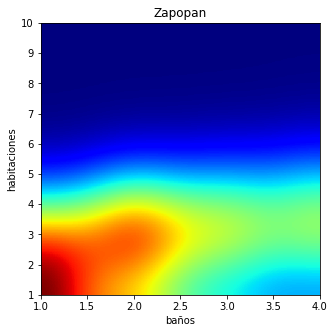

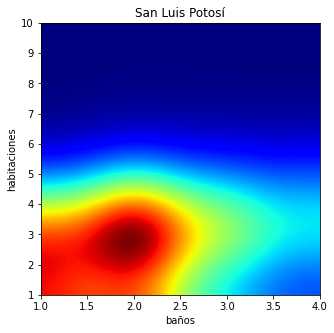

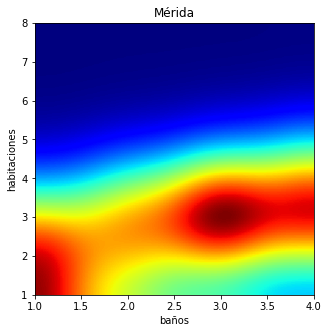

In [9]:
for i in range(len(groups)):
    df_group = df_completo[df_completo[propGroup]==groups[i]]
    fData = utils.filterData(df_group, props, pred)
    utils.showHeatMap(fData['banos'], fData[pred], 'baños', 'habitaciones', groups[i])

Mas baños = mas habitaciones...

In [10]:
phis = [ 
        lambda x: (1/(x+1)), #antiguo
        lambda x: (x/2) + 1 #banos
]

In [11]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Querétaro es de 0.15479413904570474
Error de precision para Benito Juárez es de 0.17783626856126175
Error de precision para Zapopan es de 0.15822509868858
Error de precision para San Luis Potosí es de 0.17420858533085
Error de precision para Mérida es de 0.15388737598495975


In [12]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred, validation=utils.RMSE)

Error de precision para Querétaro es de 0.6313717349910997
Error de precision para Benito Juárez es de 0.6665956381432936
Error de precision para Zapopan es de 0.6646509137791785
Error de precision para San Luis Potosí es de 0.7346197376722957
Error de precision para Mérida es de 0.6058909655986245


In [13]:
df_completo['habitaciones'].value_counts()

3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

In [14]:
props = [
    'antiguedad',
    'banos',
    'metroscubiertos'
]
phis = [ 
        lambda x: (1/(x+1)), #antiguo
        lambda x: (x/2) + 1, #banos
        lambda x: x #metroscubiertos
]

In [15]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Querétaro es de 0.1535743426015547
Error de precision para Benito Juárez es de 0.16372271297970972
Error de precision para Zapopan es de 0.15765155931228012
Error de precision para San Luis Potosí es de 0.17223704686570027
Error de precision para Mérida es de 0.15122161814793197


In [16]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred, validation=utils.RMSE)

Error de precision para Querétaro es de 0.6189596307072963
Error de precision para Benito Juárez es de 0.6030542789877226
Error de precision para Zapopan es de 0.6592863433146904
Error de precision para San Luis Potosí es de 0.7261445491781683
Error de precision para Mérida es de 0.5945418730854427


In [20]:
props = [
    'antiguedad',
    'banos',
    'metroscubiertos',
    'precio'
]
phis = [ 
        lambda x: (1/(x+1)), #antiguo
        lambda x: (x/2) + 1, #banos
        lambda x: x, #metroscubiertos
        lambda x: np.log(x) #precio
]

In [19]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred)

Error de precision para Querétaro es de 0.13437788908930015
Error de precision para Benito Juárez es de 0.15907415737660713
Error de precision para Zapopan es de 0.14332724175359524
Error de precision para San Luis Potosí es de 0.15039881163960578
Error de precision para Mérida es de 0.14142693352338254


In [22]:
utils.precisionPorGrupos(df_completo, props, groups, propGroup, phis, pred, validation=utils.RMSE)

Error de precision para Querétaro es de 0.6179357276097168
Error de precision para Benito Juárez es de 0.6031451225038932
Error de precision para Zapopan es de 0.6569488482898276
Error de precision para San Luis Potosí es de 0.7214207685783225
Error de precision para Mérida es de 0.5924647660943992


In [12]:
palabrasCaras = ['completo', 'servicio', 'terraza', 'baños', 'jardín', 'piscina', 'granito', 'acabados', 'cochera', 'amplia', 'alberca', 'garage', 'excelente', 'porcelanato', 'amplio', 'lujo', 'equipada', 'garaje', 'residencial', 'mármol', 'cristal', 'calentador', 'balcón', 'iluminación', 'riego', 'gran', 'hermosa', 'hermoso', 'vigilancia', 'seguridad', 'amplios', 'integral', 'tv', 'palapa', 'gimnasio', 'completos', 'jacuzzi', 'acondicionado', 'acondicionados', 'minisplit']

In [13]:
#Filtro el datasets por las ciudades que estaba viendo
A = df_completo[df_completo['ciudad'].isin(groups)]
A = A.dropna(subset=['descripcion'])
def getValor(desc, palabra):
    regexPattern = re.compile(palabra)
    soup = BeautifulSoup(desc)
    desc = soup.get_text()
    listOfmatches = regexPattern.findall(desc)
    return len(listOfmatches)
# A['valor'] = A['descripcion'].apply(getValor)

A['valor'] = 0

for palabra in palabrasCaras:
    A['valor'] += A.apply(lambda x : getValor(x['descripcion'], palabra), axis=1)

/home/administrador/facu/metnum-tp3/tp3/lib/python3.7/site-packages/bs4/__init__.py:336: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


In [14]:
props = [
    'antiguedad',
    'banos',
    'valor'
]
phis = [ 
        lambda x: (1/(x+1)), #antiguo
        lambda x: (x/2) + 1, #banos
        lambda x: x + 1 #valor
]

In [16]:
utils.precisionPorGrupos(A, props, groups, propGroup, phis, pred)
#las palabras caras para precio no tienen la misma relacion con decir que una casa tiene muchas habitaciones

Error de precision para Querétaro es de 0.15489296746748096
Error de precision para Benito Juárez es de 0.17754974969198556
Error de precision para Zapopan es de 0.1583043429878099
Error de precision para San Luis Potosí es de 0.17407372725687198
